In [93]:
import pandas as pd
import datetime
import numpy as np

In [70]:
df_posts_caregiver=pd.read_csv('posts_Caregivers Forum.csv')
df_posts_caregiver

,tid,uid,pid,p_content,is_start,p_date
0,2147553329,10052,148064201,\nALZConnected Moderator's Guidelines for Part...,True,"Tuesday, July 21, 2020 6:01 PM"
1,2147553335,10052,148064208,\nA message from the Alzheimer’s Association d...,True,"Tuesday, July 21, 2020 6:12 PM"
2,2147555837,2147706804,148087188,\nI know PWD often become obsessed with things...,True,"Friday, February 26, 2021 2:01 AM"
3,2147555837,2147621224,148087200,\r\n\t\tGG-My dad's obsession was my late sist...,False,"Friday, February 26, 2021 5:16 AM"
4,2147555837,2147749706,148087201,\nI'm not sure I have an answer but I sure hav...,False,"Friday, February 26, 2021 5:26 AM"
...,...,...,...,...,...,...
268638,2147489985,2147492339,147527298,\r\n\t\tThinking of you. Hope you can grab som...,False,"Tuesday, July 10, 2012 10:38 PM"
268639,2147489985,2147490895,147527301,\nI am so sorry. A taught me much about pre g...,False,"Tuesday, July 10, 2012 10:52 PM"
268640,2147489985,2147485195,147527302,\r\n\t\tSo sorry....prayers going out for your...,False,"Tuesday, July 10, 2012 11:00 PM"
268641,2147489985,2147489681,147527324,"\r\n\t\tThank you everyone, kindness from ""str...",False,"Wednesday, July 11, 2012 4:42 AM"


In [136]:
df_users_caregiver = pd.read_csv('user_caregiver_foum.csv')

In [132]:
df_users_all = pd.read_csv("user_all_forums.csv")

In [62]:
dp2 = user_all.loc[user_all['num_post']<500]
dp2.dtypes

uid           int64
username     object
join_date    object
num_post      int64
dtype: object

In [30]:
import seaborn as sns

In [64]:
p = pd.Series(user_all['num_post'],name="number of total posts")
p2 = pd.Series(dp2['num_post'],name="number of total posts")

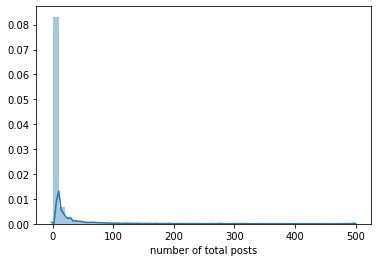

In [65]:
ax = sns.distplot(p2)

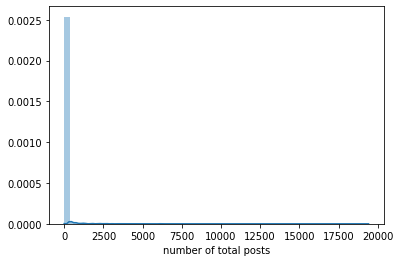

In [66]:
ax2 = sns.distplot(p)

In [117]:
d = pd.Series(gb['date_delta'],name="days between first and last posts")
d

0        3127
1           0
2        3116
3           0
4           4
         ... 
14774       0
14775       0
14776       0
14777       0
14778       0
Name: days between first and last posts, Length: 14779, dtype: int64

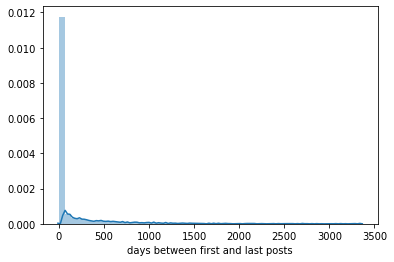

In [118]:
ax3 = sns.distplot(d)

In [124]:
def convert_day(strdate):
    day_dict = {'Monday': 1,
               'Tuesday': 2,
               'Wednesday': 3,
               'Thursday': 4,
               'Friday': 5,
               'Saturday': 6,
               'Sunday': 7
               }
    day = day_dict[strdate.split(',')[0]]
    return day

def convert_date(strdate):
    month_dict = {
            'January' : 1,
            'February' : 2,
            'March' : 3,
            'April' : 4,
            'May' : 5,
            'June' : 6,
            'July' : 7,
            'August' : 8,
            'September' : 9, 
            'October' : 10,
            'November' : 11,
            'December' : 12
    }
    strdate = strdate.replace(' ',',')
    month = month_dict[strdate.split(',')[2]]
    d = strdate.split(',')[3]
    yr = strdate.split(',')[5]
    date= '{}-{}-{}'.format(yr,month,d)
    dt = datetime.datetime.strptime(date, '%Y-%m-%d')
    return dt

def get_time_delta_col(df_posts):
    a = df_posts['p_date']
    df_posts['date']=df_posts['p_date'].apply(convert_date)
    
    gb = df_posts.groupby('uid')
    gb = gb.agg(min_date=('date',np.min), max_date=('date',np.max)).reset_index()
    gb['date_delta'] = (gb['max_date']-gb['min_date']).dt.days
    
    return gb

In [128]:
def plot_dist(df, col, colname, title):
    d = pd.Series(df[col],name=colname)
    a = sns.distplot(d).set_title(title)
    return a

Text(0.5, 1.0, 'b')

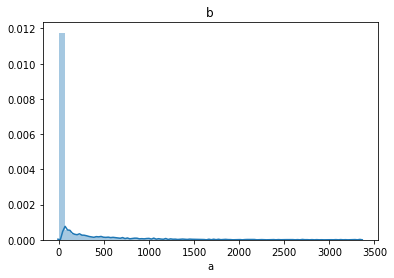

In [131]:
gb = get_time_delta_col(df_posts)
plot_dist(gb,'date_delta','a','b')

In [130]:
gb

,uid,min_date,max_date,date_delta
0,0,2011-11-29,2020-06-21,3127 days
1,1,2015-09-24,2015-09-24,0 days
2,10052,2012-01-11,2020-07-23,3116 days
3,2147483678,2011-11-14,2011-11-14,0 days
4,2147483806,2011-12-05,2011-12-09,4 days
...,...,...,...,...
14774,2147764635,2021-03-01,2021-03-01,0 days
14775,2147764676,2021-03-05,2021-03-05,0 days
14776,2147764686,2021-03-01,2021-03-01,0 days
14777,2147764705,2021-03-01,2021-03-01,0 days
